<a href="https://colab.research.google.com/github/abdullahkrs/e-Portfolio-Machine-Learning-January-2025/blob/main/Unit07_MultiLayer_Perceptron_FIXED_Attachments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧠 Unit 7: Multi-Layer Perceptron with Sigmoid Function

This notebook explores a **multi-layer perceptron (MLP)** using the **sigmoid activation function** to simulate how neural networks perform non-linear classification tasks.

## ✅ Purpose
- Understand how forward and backward propagation work in neural networks.
- Learn how to apply the **sigmoid function** for activation.
- Visualize error reduction across epochs during training.

## 🧪 Learning Outcome
You will gain a foundational understanding of how weights are updated using gradients, and how neurons in a hidden layer influence output through a multi-layer structure.

---

_Run the cells step-by-step to see how inputs are processed and adjusted during learning._


### Author: Dr Mike Lakoju

    * If X is high, the value is approximately 1
    * if X is small, the value is approximately 0

## Import Libraries

In [101]:
import numpy as np

## Define the Sigmoid Function

In [102]:
def sigmoid(sum_func):
  return 1 / (1 + np.exp(-sum_func))

In [103]:
sigmoid(0)

np.float64(0.5)

In [104]:
np.exp(2)

np.float64(7.38905609893065)

In [105]:
np.exp(1)

np.float64(2.718281828459045)

In [106]:
sigmoid(40)

np.float64(1.0)

In [107]:
sigmoid(-20.5)

np.float64(1.2501528648238605e-09)

# Input Layer to Hidden Layer

### Define "Inputs, outputs and weights" as Numpy arrays

#### Inputs

In [108]:
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])

In [109]:
inputs

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [110]:
inputs.shape

(4, 2)

#### Outputs

In [111]:
outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

In [112]:
outputs.shape

(4, 1)

### Weights

#### These weights are for the connection between the inputs and the hidden layer

In [113]:
# First row holds the weights for x1, 2nd row contains the weights for x2

weights_0 = np.array([[-0.424, -0.740, -0.961],
                     [0.358, -0.577, -0.469]])
weights_0.shape

(2, 3)

#### These weights are for the connection between the  hidden layer and the output

In [114]:
weights_1 = np.array([[-0.017],
                     [-0.893],
                     [0.148]])
weights_1.shape

(3, 1)

#### Epochs & Learning Rate

In [115]:
epochs = 100
learning_rate = 0.3

In [116]:
#for epoch in epochs:

Dealing with the first side

In [117]:
input_layer = inputs
input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [118]:
# "sum_synapse_0" This holds the sum function total of weights for the hidden layer
# For the Output: Each row holds the sum_func for each input data  [0,0,0 -> data 0,0],[0.358, -0.577, -0.469 --> 0,1]
# The dot product does the matrix multiplication and also the sum

sum_synapse_0 = np.dot(input_layer, weights_0)
sum_synapse_0

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.358, -0.577, -0.469],
       [-0.424, -0.74 , -0.961],
       [-0.066, -1.317, -1.43 ]])

In [119]:
# Computing the Sigmoid function for the Hidden layer

hidden_layer = sigmoid(sum_synapse_0)
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

Dealing with the 2nd side


In [120]:
weights_1

array([[-0.017],
       [-0.893],
       [ 0.148]])

In [121]:
# "sum_synapse_1" This holds the sum function total of weights for the output layer
# For the Output: Each row holds the sum_func for each input data

sum_synapse_1 = np.dot(hidden_layer, weights_1)
sum_synapse_1

array([[-0.381     ],
       [-0.27419072],
       [-0.25421887],
       [-0.16834784]])

In [122]:
output_layer = sigmoid(sum_synapse_1)
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [123]:
outputs

array([[0],
       [1],
       [1],
       [0]])

In [124]:
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [125]:
error_output_layer = outputs - output_layer
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [126]:
average_error = np.mean(abs(error_output_layer))
average_error

np.float64(0.49880848923713045)

Sigmoid Derivative

In [127]:
def sigmoid_derivative(sigmoid):
    return sigmoid * (1 - sigmoid)

# Delta output Calculation

In [128]:
# output_layer holds the results of our application of the sigmoid, computed above

output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [129]:
# derivative_output is our Derivative of the activation function (sigmoid) which we have on the slide
# each row is for each instance of our input dataset

derivative_output = sigmoid_derivative(output_layer)
derivative_output

array([[0.2411425 ],
       [0.24535947],
       [0.24600391],
       [0.24823702]])

In [130]:
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [131]:
# Delta output
# each row is for each instance of our input dataset

delta_output = error_output_layer * derivative_output
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

# Delta calculations for the Hidden Layer


In [132]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [133]:
weights_1

array([[-0.017],
       [-0.893],
       [ 0.148]])

#### NOTE THAT:
    * Lets deal with this part first (Weight  * delta_output)
    * Notice that we will get an error below becuase of the shape of the weights_1  (Transpose)

In [134]:
delta_output_x_weight = delta_output.dot(weights_1.T)

In [135]:
weights_1.shape

(3, 1)

In [136]:
weights_1T = weights_1.T
weights_1T

array([[-0.017, -0.893,  0.148]])

In [137]:
weights_1T.shape

(1, 3)

#### Each one of the weights will have to be multiplied by each delta_output for each data instance     
       
       array([[-0.017],
             [-0.893],
             [ 0.148]])

In [138]:
delta_output_x_weight = delta_output.dot(weights_1T)
delta_output_x_weight

array([[ 0.0016639 ,  0.08740354, -0.01448569],
       [-0.0023697 , -0.12447882,  0.02063031],
       [-0.0023554 , -0.12372783,  0.02050584],
       [ 0.00193282,  0.10153015, -0.01682694]])

#### NOTE THAT:
    * Now we need to deal with the last part of the equation   
    * sigmoid_derivative * delta_output_x_weight

In [139]:
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [140]:
#  Each row in the output of delta_hidden_layer is for the data input values

delta_hidden_layer = delta_output_x_weight * sigmoid_derivative(hidden_layer)
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

#### We will deal with the (input * delta) first
* The first column in "hidden_layer" holds  the activation value for the first neuron

In [141]:
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [142]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

* We need to multiply the "inputs" by "delta" however, for the matrix multiplication we need to transpose the values in the hidden_layer, so we have all of them on one row for each neuron

In [143]:
hidden_layerT = hidden_layer.T
hidden_layerT

array([[0.5       , 0.5885562 , 0.39555998, 0.48350599],
       [0.5       , 0.35962319, 0.32300414, 0.21131785],
       [0.5       , 0.38485296, 0.27667802, 0.19309868]])

In [144]:
input_x_delta1 = hidden_layerT.dot(delta_output)
input_x_delta1

array([[0.03293657],
       [0.02191844],
       [0.02108814]])

#### Let us now update the "weights_1"

In [145]:
weights_1 = weights_1 + (input_x_delta1 * learning_rate)
weights_1

array([[-0.00711903],
       [-0.88642447],
       [ 0.15432644]])

## Dealing with the Hidden Layer to Input Layer

In [146]:
# First column is X1, and 2nd column is X2 (our input values )

input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [147]:
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [148]:
# we need to transpose the values just as we did before

input_layerT = input_layer.T
input_layerT

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [149]:
input_x_delta0 = input_layerT.dot(delta_hidden_layer)
input_x_delta0

array([[-8.04778516e-05, -1.01345901e-02,  1.48194623e-03],
       [-9.11603819e-05, -1.17454886e-02,  2.26221011e-03]])

In [150]:
weights_0 = weights_0 + (input_x_delta0 * learning_rate)
weights_0

array([[-0.42402414, -0.74304038, -0.96055542],
       [ 0.35797265, -0.58052365, -0.46832134]])

### So all the lines of code above, has allowed us to complete our first epoch. we will need to put all the code together so we can run multiple epochs

# Complete Artificial Neural Network

In [151]:
#Importing Numpy
import numpy as np

# This is the sigmoid Function
def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

#This is the sigmoid derivative as used before
def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

# Our input values
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
#Our output values
outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

In [152]:
# weights_0 = np.array([[-0.424, -0.740, -0.961],
#                     [0.358, -0.577, -0.469]])

# weights_1 = np.array([[-0.017],
#                     [-0.893],
#                     [0.148]])

### Initializing our weights with random values
* <b>Note:</b> Multiplying the random number by 2 and subtracting by 1, allows us to have a mix of both positive and negative random numbers for the weights

In [153]:
weights_0 = 2 * np.random.random((2, 3)) - 1
weights_1 = 2 * np.random.random((3, 1)) - 1

In [154]:
epochs = 400000
learning_rate = 0.6
error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights_0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights_1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
  if epoch % 100000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)

  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output

  weights1T = weights_1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)

  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights_1 = weights_1 + (input_x_delta1 * learning_rate)

  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights_0 = weights_0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.5000667039129754
Epoch: 100001 Error: 0.011466604188231835
Epoch: 200001 Error: 0.008024924732194327
Epoch: 300001 Error: 0.006524771378499029


#### At this point after runing for 1million epochs you can see the value is very low.

In [155]:
#1 million epochs with a learning rate of 0.3
1 - 0.009670967930930745

0.9903290320690693

In [156]:
#after 400,000 epochs, with a learning rate of 0.6
1- 0.008192022809586367

0.9918079771904136

# Let's visualize this result

In [157]:
import matplotlib.pyplot as plt


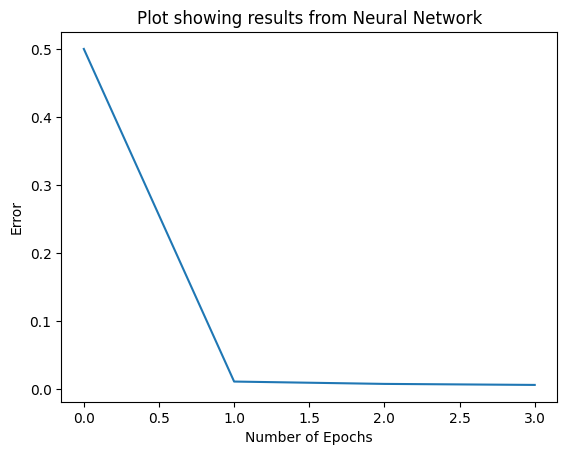

In [158]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

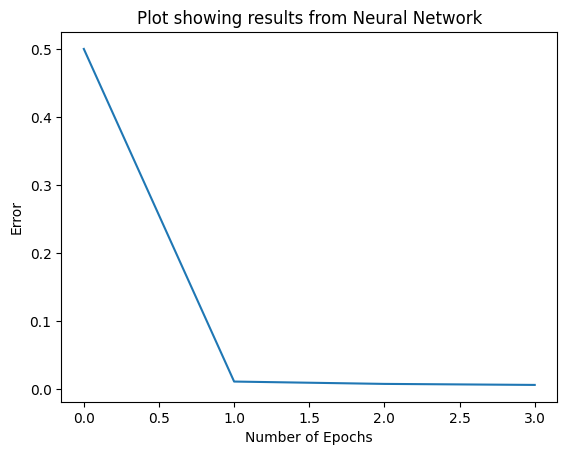

In [159]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

#### Compearing the outputs and the predictions

In [160]:
outputs

array([[0],
       [1],
       [1],
       [0]])

In [161]:
output_layer

array([[0.00442137],
       [0.9931407 ],
       [0.9942248 ],
       [0.00549226]])

#### * We see that our neural network was able to get values close to the actual values from the results.
#### * This shows that our neural network can handle the complexity of the XOR operator dataset.

* Let us see the updated weights. These are the weights we will require if we want to make future predictions

In [162]:
weights_0

array([[-6.93256029, 11.28895378,  0.90623135],
       [-7.54221281, -5.66420001, -1.53915633]])

In [163]:
weights_1

array([[-24.21634181],
       [-15.14971306],
       [ 28.53230276]])

In [164]:
# This function accepts an instance of a dataset

def calculate_output(instance):
    #input to hidden layer
    hidden_layer = sigmoid(np.dot(instance, weights_0))
    #hidden to output layer
    output_layer = sigmoid(np.dot(hidden_layer, weights_1))
    return output_layer[0]

In [165]:
round(calculate_output(np.array([0, 0])))

0

In [166]:
round(calculate_output(np.array([0, 1])))

1

In [167]:
round(calculate_output(np.array([1, 0])))

1

In [168]:
round(calculate_output(np.array([1, 1])))

0